Ideal: 0.840
> folds=2, accuracy=0.740 (0.700,0.780
> folds=3, accuracy=0.749 (0.697,0.824
> folds=4, accuracy=0.790 (0.640,0.920
> folds=5, accuracy=0.810 (0.600,0.950
> folds=6, accuracy=0.820 (0.688,0.941
> folds=7, accuracy=0.799 (0.571,1.000
> folds=8, accuracy=0.811 (0.385,0.923
> folds=9, accuracy=0.829 (0.636,1.000
> folds=10, accuracy=0.850 (0.600,1.000
> folds=11, accuracy=0.829 (0.667,1.000
> folds=12, accuracy=0.785 (0.250,1.000
> folds=13, accuracy=0.839 (0.571,1.000
> folds=14, accuracy=0.807 (0.429,1.000
> folds=15, accuracy=0.821 (0.571,1.000
> folds=16, accuracy=0.827 (0.500,1.000
> folds=17, accuracy=0.816 (0.600,1.000
> folds=18, accuracy=0.831 (0.600,1.000
> folds=19, accuracy=0.826 (0.600,1.000


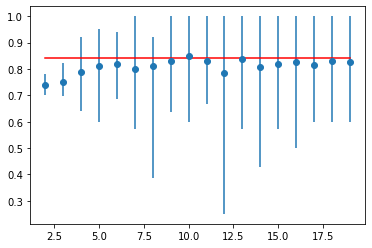

In [5]:
from numpy import mean #지정된 축을 따라 산술 평균을 계산
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

def evaluate_model(cv):
    # 가상의 분류모형 데이터를 생성
    X, y = make_classification(n_samples=100 # 표본 데이터의 수
                               , n_features=20 # 독립 변수의 수
                               , n_informative=15 # 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
                               ,n_redundant=5 # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
                               , random_state=1 # 난수 seed 설정
                              )
                               
    model = LogisticRegression() # 로지스틱 회귀 모델 생성
    # 교차 검증으로 점수 산정
    scores = cross_val_score(model # estiator: 평가모델
                             , X # 훈련 데이터
                             , y # 타겟 데이터
                             ,scoring='accuracy' # 성능 검증에 사용할 함수 이름
                             ,cv=cv# 교차 검증 분할 수
                             , n_jobs=-1 # 교차 검증을 수행할 때 사용할 CPU 코어 수를 지정. -1 : 모든 코어 사용
                            )
    return mean(scores), scores.min(), scores.max() # fold의 mean 분류 정확도와 최대 최소 정확도 리턴

# 교차 검증 Leave one out
ideal, _, _ = evaluate_model(LeaveOneOut()) 
print('Ideal: %.3f' % ideal)
                             
# 교차 검증 K-Fold                             
folds = range(2,20)
means, mins, maxs = list(), list(), list()
                             
for k in folds:
    # K-Folds cross validator / Returns the number of splitting iterations in the corss validator.
    cv = KFold(n_splits=k # 몇 개로 분할할지
               , shuffle=True # Fold를 나누기 전에 무작위로 섞음
               , random_state=1 # 난수 seed 설정
              )
    k_mean, k_min, k_max = evaluate_model(cv)
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

# 그래프 출력
pyplot.errorbar(folds, means, yerr=[mins,maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()
